In [1]:
# imports
import sys
import pandas as pd
sys.path.append('../../') # to access the files in higher directories
sys.path.append('../') # to access the files in higher directories
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import core_exp as cx
import core_calib as cal

In [2]:
params = {
    # exp
    "runs": 1,
    "exp_name": "test_setayesh",
    "cv_folds": 5,
    "plot": True,
    "calib_methods": ["RF"],
    
    "metrics": ["acc", "tce", "ece", "logloss", "BS", "CL", "GL", "IL"],

    #data
    "data_name": "synthetic",
    "plot_data": True,
    "data_size": 100,
    "n_features": 2,
    "n_copy": 10,

    "class1_mean_min":0, 
    "class1_mean_max":1,
    "class2_mean_min":1, 
    "class2_mean_max":3, 


    # calib param
    "bin_strategy": "uniform",
    "ece_bins": 20,
    "boot_size": 1000,
    "boot_count": 5,

    # RF hyper opt
    "oob": True,
    "hyper_opt": "Manual", #"Default", "Manual"
    "opt_cv":5, 
    "opt_n_iter":40,
    "opt_top_K": 5,
    "search_space": {
                    "n_estimators": [10],
                    "max_depth": [2,3,4,5,6,7,8,10,15,20,30,40,50,60,100],
                    "criterion": ["gini", "entropy"],
                    "max_features": ["sqrt", "log2"],
                    "min_samples_split": [2,3,4,5],
                    "min_samples_leaf": [1,2,3],
                    },

    # "depth": 4,
    "n_estimators": 10,

}

exp_key = "depth"
# exp_values = [2,3,4,5,10, 15, 20, 25, 30, 35, 40, 45, 50]
exp_values = [2,3,4,5,10, 15, 20]

In [3]:
calib_results_dict, data_list = cx.run_exp(exp_key, exp_values, params)
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=True, 
                                    std=True)

In [4]:
tables["tce"]

,RF
Data,
2,0.086435
3,0.073223
4,0.059809
5,0.060517
10,0.016645
15,0.020249
20,0.019206
Mean,0.048012
Rank,1.000000


In [5]:
tables["ece"]

,RF
Data,
2,0.032831
3,0.057304
4,0.041279
5,0.038038
10,0.038195
15,0.046401
20,0.067409
Mean,0.045922
Rank,1.000000


In [6]:
import scipy.stats as stats
import numpy as np

tce_ranks = np.array(tables["tce"].loc["Rank"])
ece_ranks = np.array(tables["ece"].loc["Rank"])
brier_ranks = np.array(tables["BS"].loc["Rank"])
logloss_ranks = np.array(tables["logloss"].loc["Rank"])
acc_ranks = np.array(tables["acc"].loc["Rank"])

tau, p_value = stats.kendalltau(tce_ranks, brier_ranks)
print(f"tau {tau} p_value {p_value}")

tau nan p_value nan


In [7]:
plot_calib_methods = params["calib_methods"].copy()
# plot_calib_methods.remove("Rank")
# plot_calib_methods.remove("Elkan")
# plot_calib_methods.remove("RF")
plot_calib_methods

['RF']

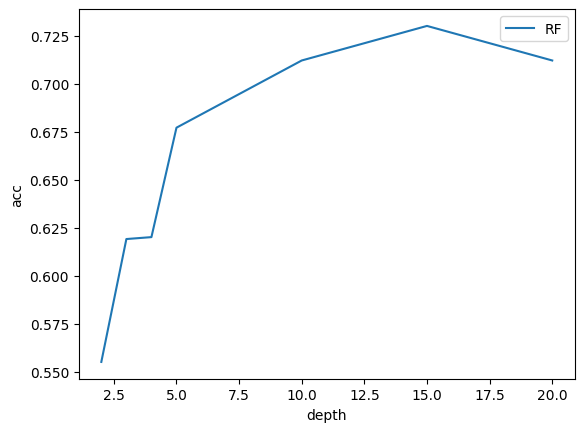

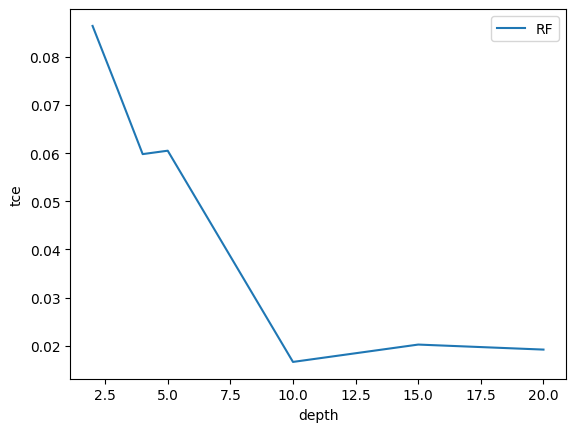

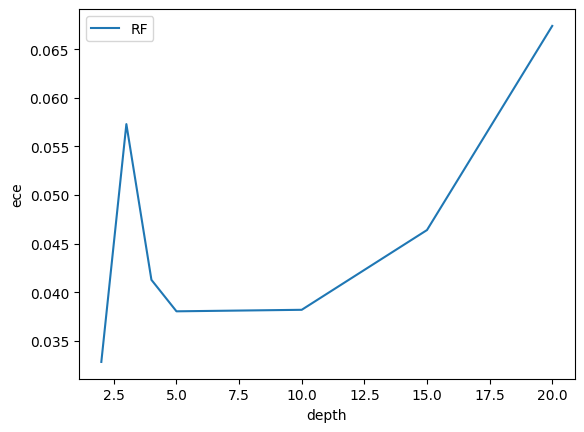

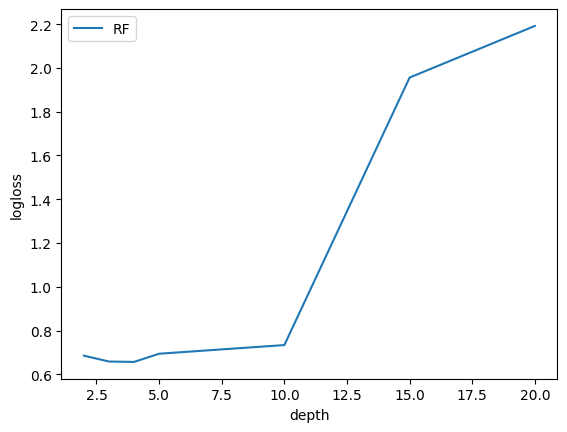

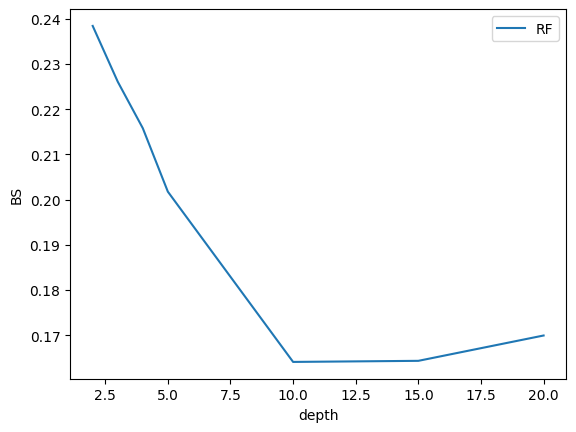

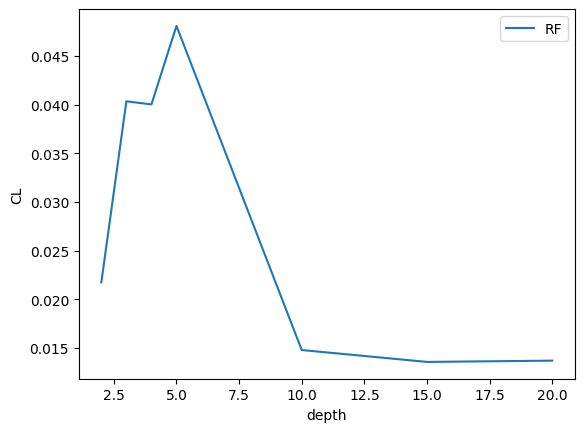

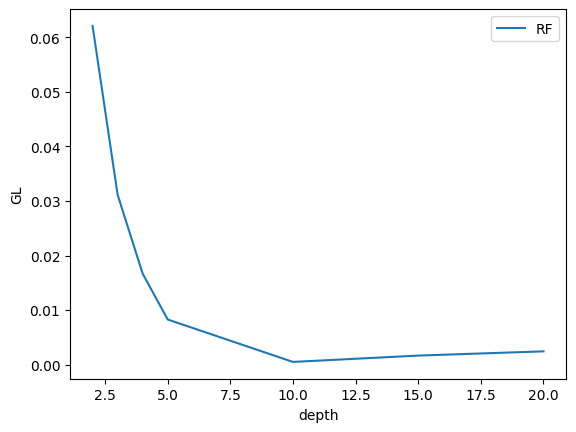

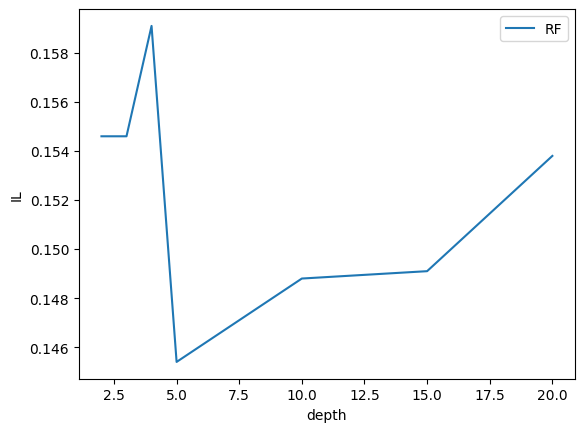

In [8]:
tables_plot = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=False, 
                                    std=True)
for metric in params["metrics"]:
    ax = tables_plot[metric][plot_calib_methods].plot()
    ax.set_xlabel(exp_key)
    ax.set_ylabel(metric)